In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate training data
def generate_data(num_samples):
    x1 = np.random.uniform(-1, 1, num_samples)
    x2 = np.random.uniform(-1, 1, num_samples)
    y = (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2
    return np.column_stack((x1, x2)), y.reshape(-1, 1)

In [3]:
# Define the Neural Network Architecture
class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialization for weights
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.bias_output = np.zeros((1, output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        return self.final_input

    def backward(self, X, y, output):
        output_error = y - output
        output_delta = output_error  # No activation on output layer
        
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.relu_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs, batch_size):
        for _ in range(epochs):
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

    def predict(self, X):
        return self.forward(X)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def weights_and_biases(self):
        return {
            'Weights Input-Hidden': self.weights_input_hidden,
            'Bias-Hidden': self.bias_hidden,
            'Weights Hidden-Output': self.weights_hidden_output,
            'Bias-Output': self.bias_output,
        }

In [4]:
# Train the network
X_train, y_train = generate_data(200)

ann = SimpleANN(input_size=2, hidden_size=20, output_size=1)
ann.train(X_train, y_train, epochs=5000, batch_size=10)

In [5]:
# Get weights and biases after training
weights_and_biases = ann.weights_and_biases()
print("Weights and Biases after Training:")
for key, value in weights_and_biases.items():
    print(f"{key}:\n{value}\n")

Weights and Biases after Training:
Weights Input-Hidden:
[[ 16.17591368 -14.42217581  -3.31033246   1.87034067 -17.42284394
  -18.01070226  -2.53729345  14.7589579  -18.97903075   1.61105237
    2.5088391   -1.4645703   -5.53619945  -2.87677081   4.97969005
    3.93771313  -5.57090807  -5.49869523  23.93693948  20.05334435]
 [  7.87381432   8.18510772  -2.3859228   -9.44402447  -2.69337766
   -6.86859776  -7.65012666  -2.84466328  -5.94899815  -7.66206844
   10.67029289 -12.81805809   3.46161436   3.68401362   7.64702931
    6.03549198  -0.44759485  10.51795438  -6.92393531  -8.21551883]]

Bias-Hidden:
[[ -8.369228    -8.00135732  -4.35067346  -2.00065199 -15.51765774
   -8.40557425  -2.57495934 -14.18124061 -14.33519844   2.0084216
   -6.06513329  -8.50305775   1.27782558  -0.88050316  -1.24955766
   -0.97419299  -5.18093117  -4.69296698 -19.21604513 -10.3338176 ]]

Weights Hidden-Output:
[[-5.84848236]
 [-6.77115536]
 [ 4.85798426]
 [ 3.95346456]
 [13.77420442]
 [ 5.99338974]
 [ 4.46

In [6]:
# Generate test data
X_test, y_test = generate_data(100)

In [7]:
# Calculate training and test errors
train_predictions = ann.predict(X_train)
test_predictions = ann.predict(X_test)

train_error = ann.mean_squared_error(y_train, train_predictions)
test_error = ann.mean_squared_error(y_test, test_predictions)

print(f"Training Error (MSE): {train_error:.6f}")
print(f"Test Error (MSE): {test_error:.6f}")

Training Error (MSE): 6.561068
Test Error (MSE): 12.360928


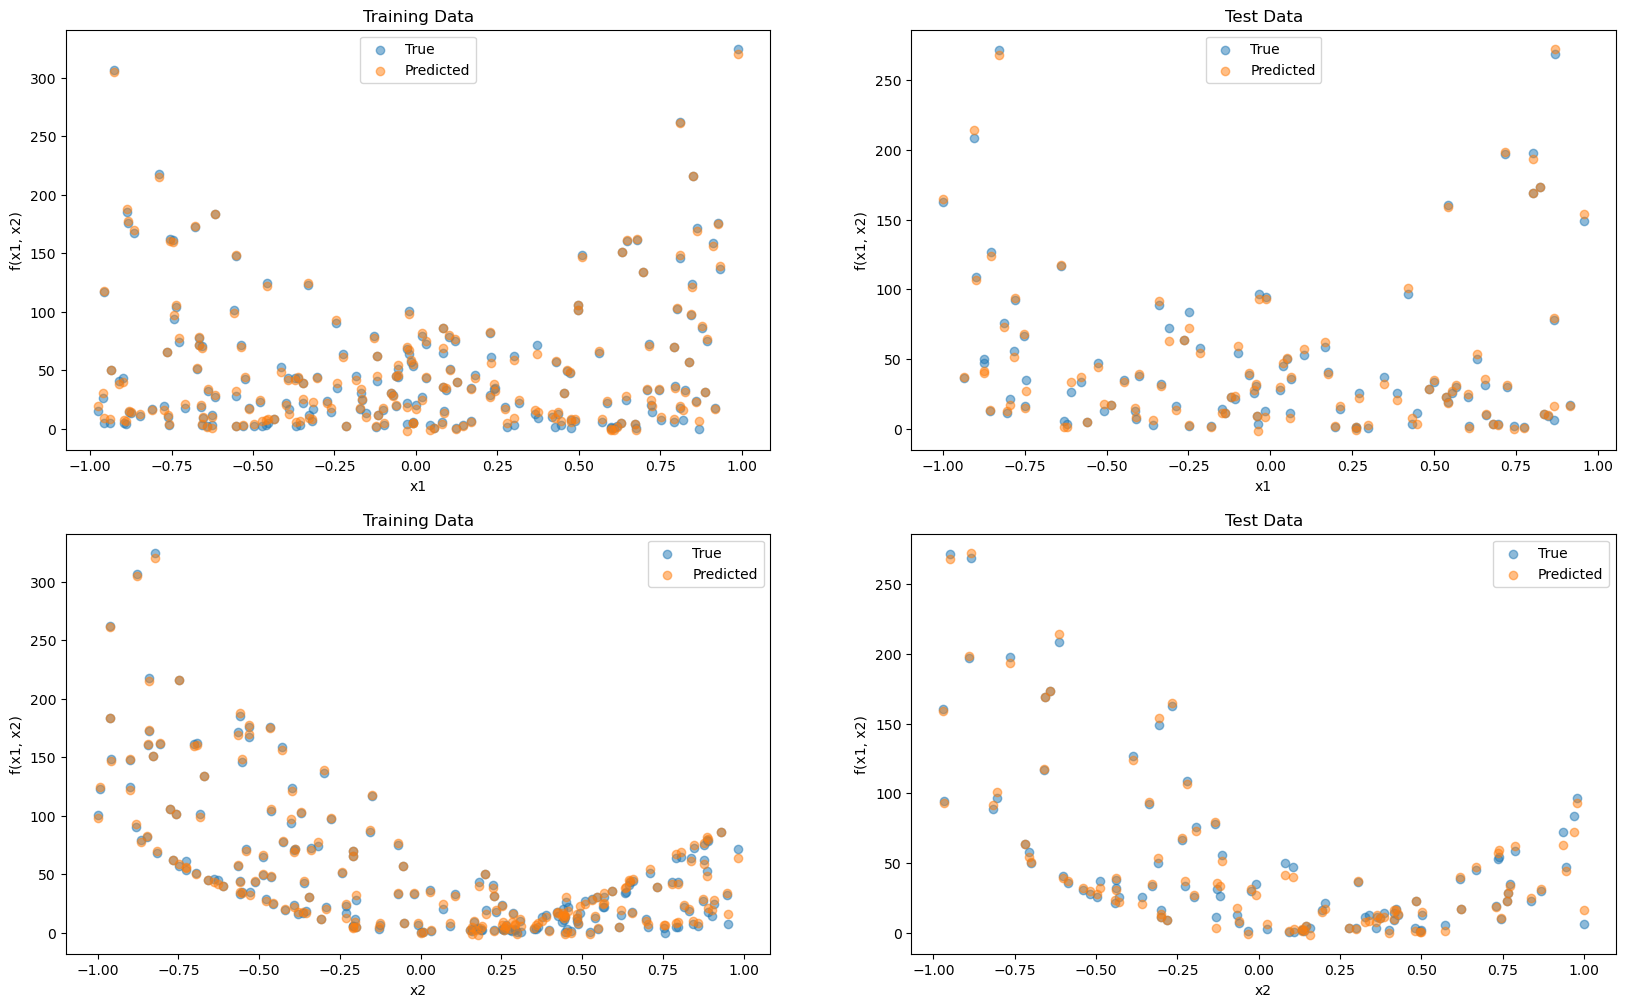

In [10]:
# Plotting the results
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.scatter(X_train[:, 0], y_train, label='True', alpha=0.5)
plt.scatter(X_train[:, 0], train_predictions, label='Predicted', alpha=0.5)
plt.title("Training Data")
plt.xlabel("x1")
plt.ylabel("f(x1, x2)")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_test[:, 0], y_test, label='True', alpha=0.5)
plt.scatter(X_test[:, 0], test_predictions, label='Predicted', alpha=0.5)
plt.title("Test Data")
plt.xlabel("x1")
plt.ylabel("f(x1, x2)")
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_train[:, 1], y_train, label='True', alpha=0.5)
plt.scatter(X_train[:, 1], train_predictions, label='Predicted', alpha=0.5)
plt.title("Training Data")
plt.xlabel("x2")
plt.ylabel("f(x1, x2)")
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_test[:, 1], y_test, label='True', alpha=0.5)
plt.scatter(X_test[:, 1], test_predictions, label='Predicted', alpha=0.5)
plt.title("Test Data")
plt.xlabel("x2")
plt.ylabel("f(x1, x2)")
plt.legend()

plt.show()